# Monte Carlo Simulation:
To calcualte the probability of the model outcome base on putting random variable into the model. The simulation is similar to the process that decision maker keeps asking "What if... then...." And record all the results to calculate the probability. 

Ref:
- https://www.investopedia.com/terms/m/montecarlosimulation.asp
- https://pythonprogramming.net/monte-carlo-simulator-python/


# Gambling Scenario
There is a dice that has 1 ~ 100 outcome. If the user rolls anything from 1-50, the "house" wins. If the user rolls anything from 51 to 99, the "user" wins. If the user rolls a 100, they lose.

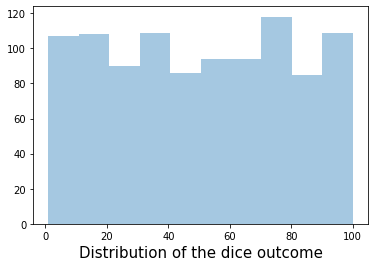

In [50]:
import random
import seaborn as sns
import matplotlib.pyplot as plt


# create a dice that has 1 ~ 100 outcome and the probability of each outcome is the same
def rollDice():
    roll = random.randint(1,100)
    return roll

# row the dice 100 times
result = []
for i in range(0, 1000):
    result.append(rollDice())

# The outcome will similar to uniform distribution
plot = sns.distplot(result, kde=False)
x_label = plt.xlabel("Distribution of the dice outcome", fontsize=15)

In [59]:
# Create ambling scenario
def outcome(roll):
    # player lose, house win!    
    if roll == 100:
        return False
    
    # player lose, house win!    
    elif roll <= 50:
        return False
    # player win!    
    elif 100 > roll >= 50:
        return True

    
def bettor(funds, wager, rounds): 
    value = funds
    funds_record = [funds]
    
    for i in range(0, rounds):
        # if funds still positive        
        if value - wager >  0:
            if outcome(rollDice()):
                value += wager
            else:
                value -= wager
        else:
            value = 0
        
        funds_record.append(value)
        # print(f'Remain funds: {value}') 
            
    return funds_record

In [94]:
# Simulate n player play the same game
players_numebr = 20
players_record = []

for player in range(0, players_numebr):
    funds_record = bettor(10000, 10, 10000)
    players_record.append(funds_record)


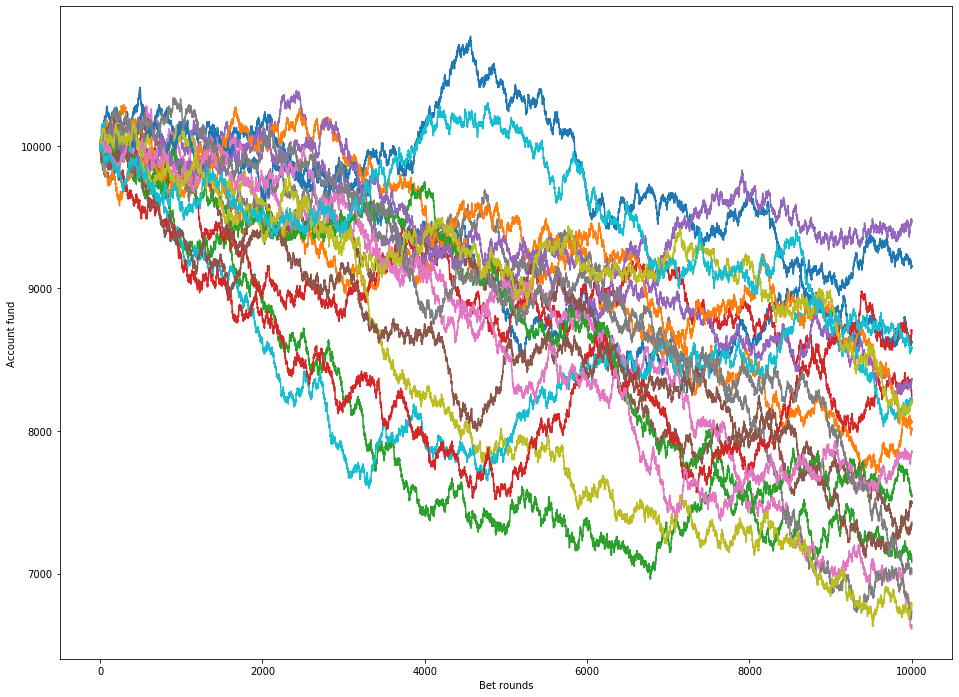

In [95]:
# visual the result
plt.figure(figsize=(16,12))
for y in players_record:
    x = list(range(0, len(y)))
    plt.plot(x, y)
    
plt.ylabel('Account fund')
plt.xlabel('Bet rounds')
plt.show()

